In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("/content/mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [ ]:
print(data.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
# Convert the first 11 columns of the DataFrame to a matrix
MD_x = data.iloc[:, :11].to_numpy()

# Convert "Yes" to 1 and everything else to 0
MD_x_binary = (MD_x == "Yes").astype(int)

# Calculate the column means and round them to 2 decimal places
column_means = np.round(np.mean(MD_x_binary, axis=0), 2)

# Print the column means
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [ ]:
# by calculating mean we can calculate the percentage of "yes" and "no" in that column.
# if the number is more than 0.50 that indicates that there is more "yes" than "no" and viceversa.

In [ ]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_binary)

# Get explained variance and variance ratios
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Summary
summary = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Explained Variance Ratio': explained_variance_ratio
})

# Print summary
print(summary)

    Principal Component  Explained Variance  Explained Variance Ratio
0                     1            0.573124                  0.299447
1                     2            0.369002                  0.192797
2                     3            0.254641                  0.133045
3                     4            0.159040                  0.083096
4                     5            0.113842                  0.059481
5                     6            0.096270                  0.050300
6                     7            0.083925                  0.043849
7                     8            0.075692                  0.039548
8                     9            0.070358                  0.036761
9                    10            0.061922                  0.032353
10                   11            0.056123                  0.029323


In [ ]:
# Assuming MD_pca has been calculated and is a NumPy array
# Get the number of principal components
num_components = MD_pca.shape[1]

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=MD_pca, columns=[f'PC{i + 1}' for i in range(num_components)])

# Print the DataFrame with one decimal place
print(pca_df.round(1))

      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0    -0.4  0.2 -0.7 -0.4 -0.2  0.4 -0.2 -0.2 -0.2  -0.5   0.6
1     0.2 -0.4  0.7 -0.1 -0.0  0.1 -0.1  0.0 -0.1  -0.5   0.5
2    -0.4 -0.7  0.1  0.7 -0.8  0.7  0.6 -0.4  0.3  -0.1  -0.2
3     0.2  0.4  0.8  0.2  0.7  0.0 -0.1  0.2  0.0   0.3   0.1
4    -0.2  0.8 -0.0  0.5 -0.9  0.1 -0.5 -0.2  0.1  -0.0  -0.1
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...
1448 -1.6 -0.3  0.0  0.2  0.1 -0.3 -0.1 -0.3  0.1   0.4   0.5
1449  1.0 -0.0 -0.3  0.4  0.1 -0.4 -0.3 -0.9  0.3   0.2   0.2
1450  0.2 -1.1 -0.2 -0.5  0.2  0.2 -0.1  0.0 -0.0  -0.1   0.0
1451  1.2  0.0 -0.6  0.7 -0.0 -0.2 -0.0  0.3 -0.0   0.0   0.1
1452 -1.6 -0.3  0.0  0.2  0.1 -0.3 -0.1 -0.3  0.1   0.4   0.5

[1453 rows x 11 columns]


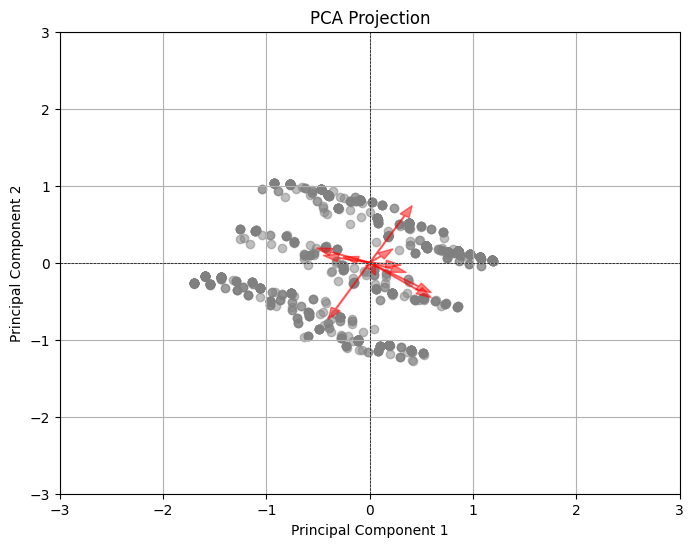

In [ ]:
# Plotting the PCA projections
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)

# Adding PCA axes
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.5, width=0.01, head_width=0.1)

plt.xlim(-3, 3)  # Set limits for better visualization
plt.ylim(-3, 3)  # Set limits for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.show()

In [ ]:
# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_binary)

In [ ]:
# Set a random seed for reproducibility
np.random.seed(1234)

# Initialize variables for storing the best model and its corresponding score
best_k = 0
best_model = None
best_score = -1

# Loop through the range of cluster sizes from 2 to 8
for n_clusters in range(2, 9):
    # Fit KMeans with the current number of clusters
    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = model.fit_predict(MD_x_scaled)

    # Calculate silhouette score
    score = silhouette_score(MD_x_scaled, labels)

    # Update the best model if the current one has a higher silhouette score
    if score > best_score:
        best_score = score
        best_model = model
        best_k = n_clusters

# Relabeling the clusters based on the cluster centers
# Get the cluster centers
centers = best_model.cluster_centers_

# Create a mapping from old labels to new labels based on sorted centers
sorted_indices = np.argsort(centers, axis=0).flatten()  # Flatten to make it 1D

# Create a new label mapping
relabel_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}

# Relabel the cluster labels based on the mapping
relabelled_labels = np.vectorize(relabel_mapping.get)(best_model.labels_)

# Now you can view the relabelled labels
print("Best K (clusters):", best_k)
print("Relabelled Cluster Labels:", relabelled_labels)

Best K (clusters): 8
Relabelled Cluster Labels: [78 84 79 ... 85 86 74]


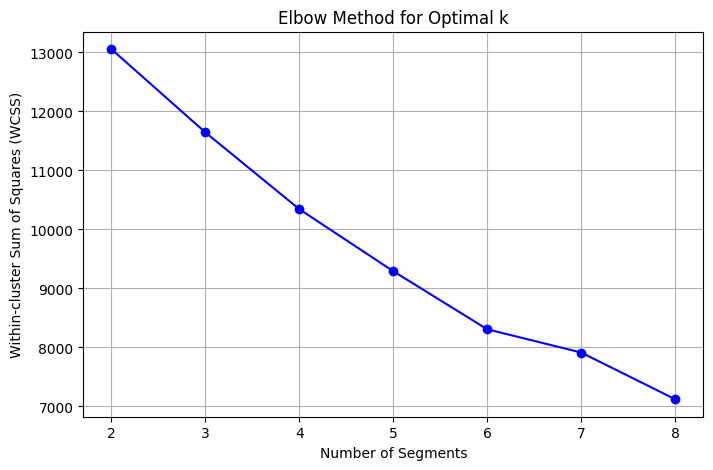

In [ ]:
# Initialize a list to store the inertia (WCSS) for each K
inertia = []

# Loop through the range of cluster sizes from 2 to 8
for n_clusters in range(2, 9):
    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    model.fit(MD_x_scaled)

    # Append the inertia (WCSS) to the list
    inertia.append(model.inertia_)

# Plotting the WCSS against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Segments')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(2, 9))
plt.grid()
plt.show()

In [ ]:
# Parameters
cluster_range = range(2, 9)  # 2 to 8
n_bootstraps = 100  # Number of bootstrap samples
results = {k: [] for k in cluster_range}  # Dictionary to store results

# Bootstrapping procedure
for _ in range(n_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = MD_x_scaled[np.random.choice(MD_x_scaled.shape[0], size=MD_x_scaled.shape[0], replace=True)]

    # Fit K-means for each cluster size
    for n_clusters in cluster_range:
        model = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        model.fit(bootstrap_sample)
        results[n_clusters].append(model.inertia_)  # Store the inertia (WCSS)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the bootstrapped results
print("Bootstrapped K-means results (WCSS):")
print(results_df.head())  # Display the first few rows for inspection

Bootstrapped K-means results (WCSS):
              2             3             4            5            6  \
0  12992.539595  11560.661701  10330.308989  9243.995874  8309.214699   
1  13272.426298  11607.902910  10289.538289  9143.289564  8252.729825   
2  13316.597880  11720.611461  10533.227402  9501.515941  8625.196370   
3  12715.952821  11318.176921  10143.158799  9044.553566  7949.819698   
4  13207.608127  11691.616342  10295.185671  9223.788122  8258.957659   

             7            8  
0  7633.224596  7010.815949  
1  7892.950920  7162.637646  
2  7927.614970  7239.861499  
3  7453.214343  6944.830726  
4  7594.281776  7108.552565  
